In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Relation.csv

In [2]:
relation_df_train = pd.read_csv('../../data/Train/Relation/Relation.csv').drop(columns=['Unnamed: 0'])
relation_df_train.head()

,userid,like_id
0,c6a9a43058c8cc8398ca6e97324c0fae,8628204013
1,c6a9a43058c8cc8398ca6e97324c0fae,19040608370
2,c6a9a43058c8cc8398ca6e97324c0fae,24054583527
3,c6a9a43058c8cc8398ca6e97324c0fae,26726417043
4,c6a9a43058c8cc8398ca6e97324c0fae,31796936730


Next, let's see if some of those page ids (like_id) exist in the Test dataset (if not, we wouldn't be able to infer anything based on which id shows up in the Test set):

In [3]:
relation_df_test = pd.read_csv('../../data/Public_Test/Relation/Relation.csv').drop(columns=['Unnamed: 0'])

In [4]:
test_set_unique_ids = set(relation_df_test['like_id'])
train_set_unique_ids = set(relation_df_train['like_id'])
common_ids = test_set_unique_ids.intersection(train_set_unique_ids)
ids_in_common = len(common_ids)
percentage_common = 100 * ids_in_common / (len(test_set_unique_ids) + len(train_set_unique_ids))
print("Amount of pages in common between the Train and Test sets: {} or {}%".format(ids_in_common, percentage_common))

Amount of pages in common between the Train and Test sets: 23581 or 4.113369278725642%


As we can see, there are not so many ids in common. We might be able to still use the Train set to infer the Test set. Let's continue.

Let's take a look at how many times each page was liked in the Train set:

In [5]:
page_id_like_counts = relation_df_train['like_id'].value_counts()
print("Total unique pages: {}".format(len(page_id_like_counts)))
print("Pages with <= 50 likes: {}".format(len(page_id_like_counts[page_id_like_counts <= 50])))
print("Pages with > 50 likes: {}".format(len(page_id_like_counts[page_id_like_counts > 50])))

Total unique pages: 536204
Pages with <= 50 likes: 531612
Pages with > 50 likes: 4592


Since most pages have less than 50 likes, the density function is extremely skewed towards the left:

(-5, 2000)

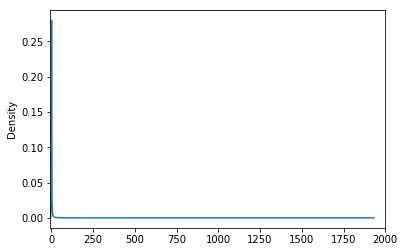

In [6]:
page_id_like_counts.plot.kde().set_xlim(-5, 2000)

If we zoom in to ones that have up to 50 likes:

(0, 50)

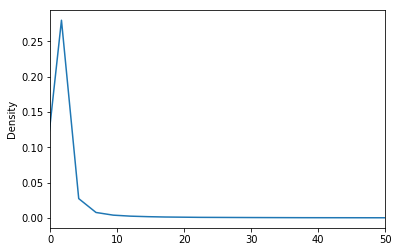

In [7]:
page_id_like_counts.plot.kde().set_xlim(0,50)

Then we see that a majority (99%+) have less than 10 likes.

# Comparison to Profile.csv

In [8]:
profile_df = pd.read_csv('../../data/Train/Profile/Profile.csv').drop(columns=['Unnamed: 0'])

In [9]:
page_id_like_counts

112936425387489      1289
24609282673          1136
7608631709           1061
7270241753           1033
10376464573           911
26748225422           906
8210451787            897
20531316728           857
7914733474            850
6708787004            835
22092443056           815
114998944652          810
45309870078           796
5660597307            787
69116329538           786
130405304915          751
9098498615            731
6278093869            700
40796308305           690
10212595263           683
11784025953           663
7126051465            662
29112278285           662
16453049322           661
19691681472           644
5388374962            641
9588466619            637
156794164312          631
82499119653           627
107641979264998       624
                     ... 
106194829411533         1
127563827278322         1
246246278139            1
117996151576574         1
164407130276186         1
113476015333577         1
239969356610            1
104497460077

The most liked page has 1289 likes. Let's look at a violin plot of the five personality characteristics of the people that liked that page:

In [12]:
def get_users_who_like_a_page(approx_like_count):    
    page_id = page_id_like_counts[page_id_like_counts < approx_like_count].keys()[0]
    relation_users_who_liked_page_id = relation_df_train[relation_df_train['like_id'] == page_id]['userid']
    profile_users_who_liked_page_id = profile_df[profile_df['userid'].isin(relation_users_who_liked_page_id)]
    return page_id, profile_users_who_liked_page_id

def plot_personality_violin_plot(page_id, data):
    print("How many likes page id {} got: {}".format(page_id, len(data)))
    sns.violinplot(
        data=data.iloc[:, 3:]
    ).set_title('Violin plot of people that liked page id {}'.format(page_id))

How many likes page id 112936425387489 got: 1289


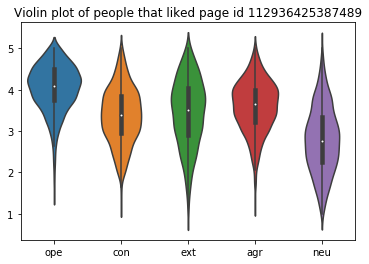

In [13]:
plot_personality_violin_plot(*get_users_who_like_a_page(1300))

Here we see that the range of values is all the domain [1:5]. Perhaps not very good for an estimate. But if we look at a page id that has far less likes:

How many likes page id 203071142594 got: 9


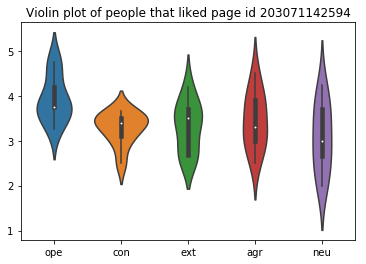

In [19]:
plot_personality_violin_plot(*get_users_who_like_a_page(10))

Then we can see that the graph looks quite different. Some values get more precise, some get less precise. For all values (except neu in this case), the range of values shrinks. With some tuning, and taking into account all the likes of a person instead of just one page, allow us, to predict people's personalities?